In [ ]:
# Get data
# We will use the Criteo Uplift Prediction Dataset from scikit-uplift

# Install package:

!pip install -q scikit-uplift


In [ ]:
# Import data:
# This will take a while
from sklift.datasets import fetch_criteo

X, y, t = fetch_criteo(return_X_y_t=True)


In [ ]:
# Visualize data:

print(X.head())
print(y.head())
print(t.head())


          f0         f1        f2        f3         f4        f5        f6  \
0  12.616365  10.059654  8.976429  4.679882  10.280525  4.115453  0.294443   
1  12.616365  10.059654  9.002689  4.679882  10.280525  4.115453  0.294443   
2  12.616365  10.059654  8.964775  4.679882  10.280525  4.115453  0.294443   
3  12.616365  10.059654  9.002801  4.679882  10.280525  4.115453  0.294443   
4  12.616365  10.059654  9.037999  4.679882  10.280525  4.115453  0.294443   

         f7        f8         f9       f10       f11  
0  4.833815  3.955396  13.190056  5.300375 -0.168679  
1  4.833815  3.955396  13.190056  5.300375 -0.168679  
2  4.833815  3.955396  13.190056  5.300375 -0.168679  
3  4.833815  3.955396  13.190056  5.300375 -0.168679  
4  4.833815  3.955396  13.190056  5.300375 -0.168679  
0    0
1    0
2    0
3    0
4    0
Name: visit, dtype: Int8
0    1
1    1
2    1
3    1
4    1
Name: treatment, dtype: Int8


In [ ]:
# Split in train and test set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(X, y, t, test_size=0.3)

# Convert targets to integer:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [ ]:
from sklift.models import SoloModel, TwoModels
from sklearn.linear_model import LogisticRegression

# Single model:
sm = SoloModel(estimator=LogisticRegression(), method='treatment_interaction')

sm.fit(X=X_train, y=y_train, treatment=t_train)
uplift_pred_sm = sm.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Two models:
tm = TwoModels(estimator_trmnt=LogisticRegression(), 
               estimator_ctrl=LogisticRegression())

tm.fit(X=X_train, y=y_train, treatment=t_train)
uplift_pred_tm = tm.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


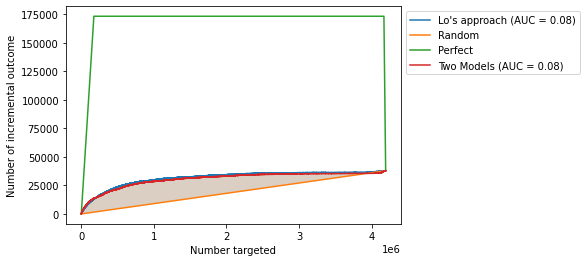

In [ ]:
from sklift.viz import plot_qini_curve, plot_uplift_by_percentile
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()
plot_qini_curve(y_true=y_test, uplift=uplift_pred_sm, treatment=t_test, ax=ax, name='Lo\'s approach')
plot_qini_curve(y_true=y_test, uplift=uplift_pred_tm, treatment=t_test, ax=ax, name='Two Models')


Lo's approach:


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


Two models:


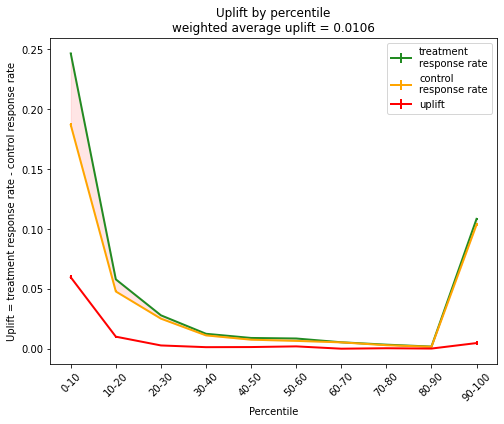

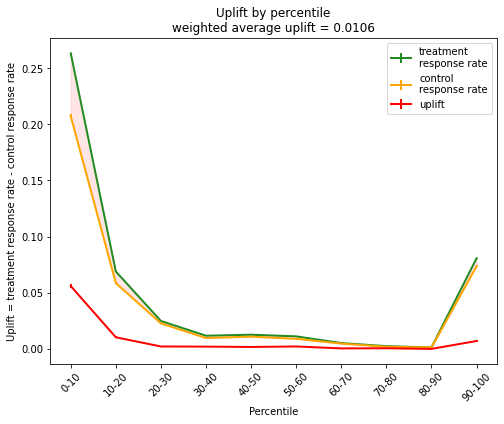

In [ ]:
# fig = plt.figure()
# ax = fig.gca()
print('Lo\'s approach:')
plot_uplift_by_percentile(y_true=y_test, uplift=uplift_pred_sm, treatment=t_test)

print('Two models:')
plot_uplift_by_percentile(y_true=y_test, uplift=uplift_pred_tm, treatment=t_test)
